# Jarvis AI - Getting Started

This notebook demonstrates the basic usage of the Jarvis AI framework.

In [12]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Jarvis AI imports
import sys
sys.path.append('../src')

# Check PyTorch availability
try:
    import torch
    print(f"✓ PyTorch version: {torch.__version__}")
    torch_available = True
except ImportError:
    print("✗ PyTorch not available")
    torch_available = False

# Import Jarvis AI modules
from models import SimpleNeuralNetwork
from data import DataProcessor
from training import Trainer
from inference.predictor import ModelPredictor

print("✓ Jarvis AI environment ready!")
print(f"✓ Neural Network support: {torch_available}")
print(f"✓ Available classes: SimpleNeuralNetwork, DataProcessor, Trainer, ModelPredictor")

✓ PyTorch version: 2.7.1+cpu
✓ Jarvis AI environment ready!
✓ Neural Network support: True
✓ Available classes: SimpleNeuralNetwork, DataProcessor, Trainer, ModelPredictor


## 1. Data Generation and Processing

Let's start by creating some sample data and preprocessing it.

In [13]:
# Generate sample data for demonstration
np.random.seed(42)

# Create synthetic dataset
n_samples = 1000
n_features = 4

X = np.random.randn(n_samples, n_features)
# Create target as a linear combination with some noise
true_weights = np.array([1.5, -2.0, 0.5, 3.0])
y = X @ true_weights + 0.1 * np.random.randn(n_samples)

# Create DataFrame
feature_names = [f'feature_{i}' for i in range(n_features)]
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())

Dataset shape: (1000, 5)

First few rows:
   feature_0  feature_1  feature_2  feature_3    target
0   0.496714  -0.138264   0.647689   1.523030  5.828184
1  -0.234153  -0.234137   1.579213   0.767435  3.205834
2  -0.469474   0.542560  -0.463418  -0.465730 -3.416428
3   0.241962  -1.913280  -1.724918  -0.562288  1.687445
4  -1.012831   0.314247  -0.908024  -1.412304 -6.975350


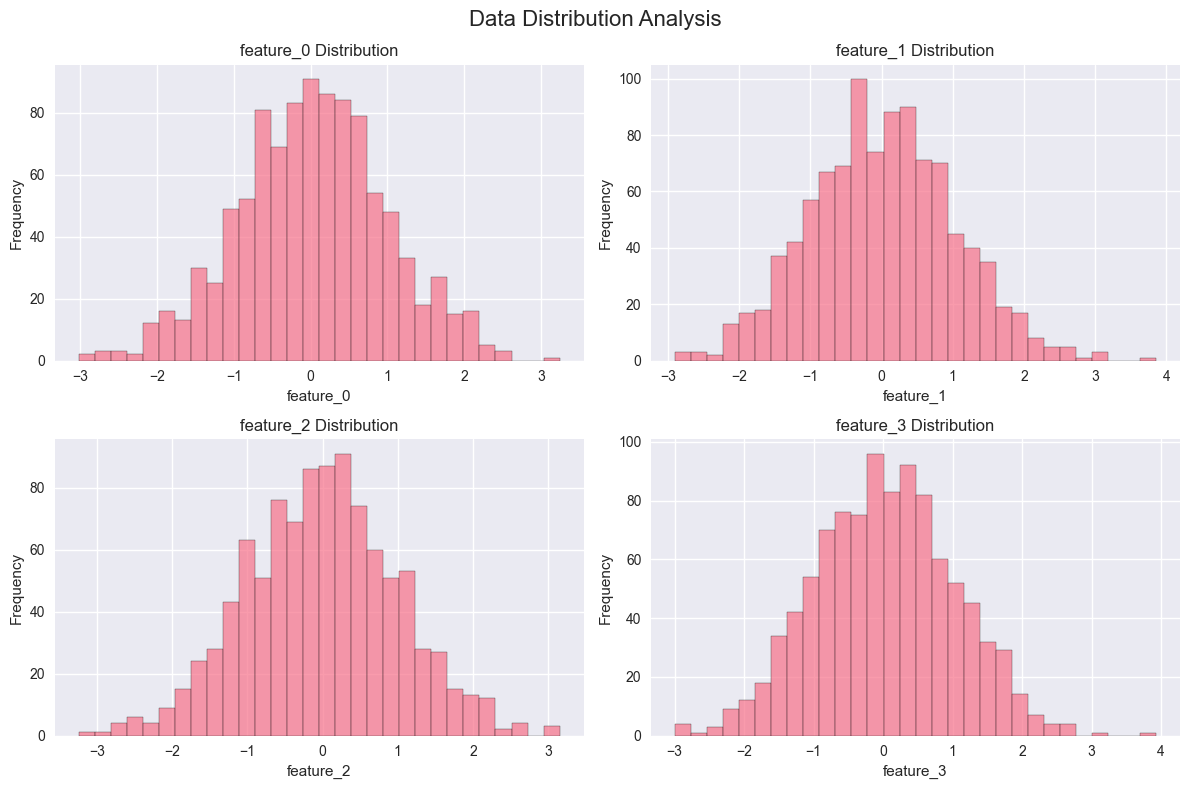

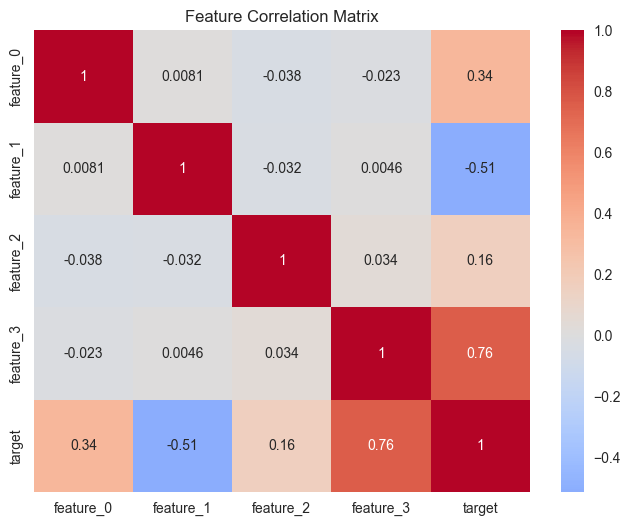

In [14]:
# Data exploration
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Data Distribution Analysis', fontsize=16)

# Plot feature distributions
for i, feature in enumerate(feature_names):
    ax = axes[i//2, i%2]
    ax.hist(df[feature], bins=30, alpha=0.7, edgecolor='black')
    ax.set_title(f'{feature} Distribution')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

## 2. Data Preprocessing

Process the data using Jarvis AI data utilities.

In [15]:
# Initialize data processor
processor = DataProcessor()

# Separate features and target
X = df[feature_names]
y = df['target'].values

# Preprocess features
X_processed = processor.preprocess_features(X, fit_transform=True)

# Split data
X_train, X_test, y_train, y_test = processor.split_data(X_processed, y, test_size=0.2)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Feature scaling applied: {processor.is_fitted}")

Training set shape: (800, 4)
Test set shape: (200, 4)
Feature scaling applied: True


## 3. Model Training

Train a neural network using the Jarvis AI framework.

In [16]:
# Create neural network model
model = SimpleNeuralNetwork(
    input_size=n_features,
    hidden_sizes=[16, 8],
    output_size=1,
    activation='relu',
    dropout=0.1
)

print(f"Model architecture: {model}")
print(f"Number of parameters: {sum(p.numel() for p in model.parameters())}")

Model architecture: SimpleNeuralNetwork(
  (network): Sequential(
    (0): Linear(in_features=4, out_features=16, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=16, out_features=8, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.1, inplace=False)
    (6): Linear(in_features=8, out_features=1, bias=True)
  )
)
Number of parameters: 225


In [17]:
# Initialize trainer
trainer = Trainer(experiment_name="jarvis_demo")

# Training configuration
config = {
    'epochs': 100,
    'learning_rate': 0.01,
    'batch_size': 32,
    'hidden_sizes': [16, 8],
    'dropout': 0.1
}

# Train model
results = trainer.train_model(
    model=model,
    X_train=X_train,
    y_train=y_train,
    X_val=X_test,
    y_val=y_test,
    config=config
)

print("\nTraining Results:")
for key, value in results.items():
    print(f"{key}: {value:.4f}")

2025/06/14 22:47:49 INFO mlflow.tracking.fluent: Experiment with name 'jarvis_demo' does not exist. Creating a new experiment.
C:\Users\willi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
2025/06/14 22:47:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/06/14 22:48:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training Results:
train_score: -14.6783
training_time: 4.5248
val_score: -13.9253


## 4. Model Evaluation

Evaluate the trained model performance.

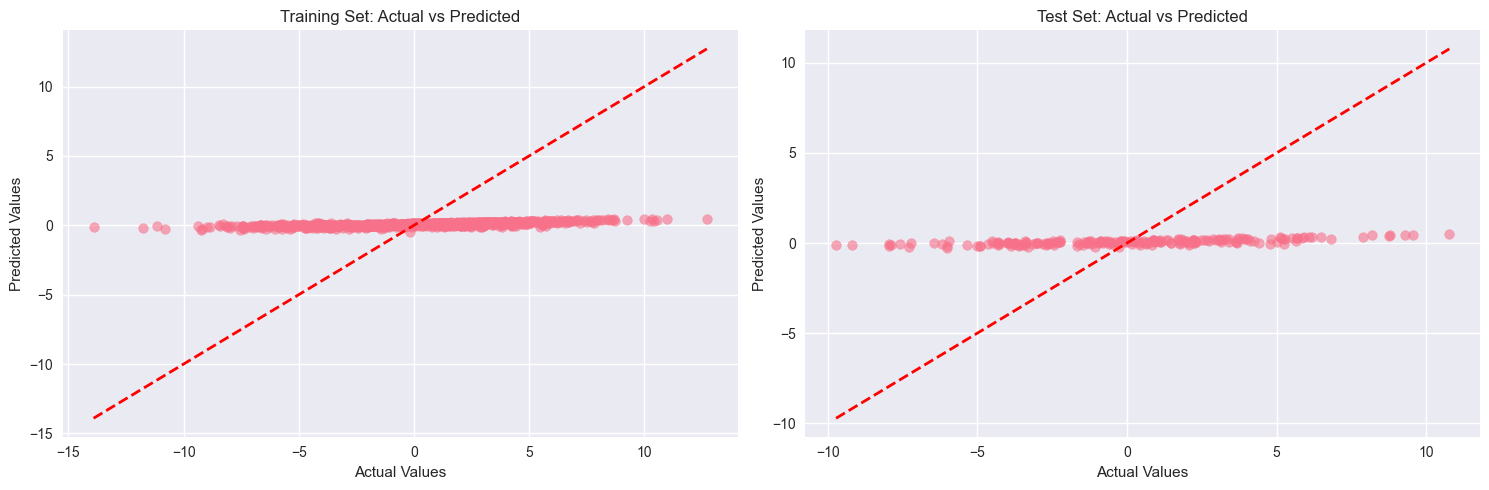

Training MSE: 14.6783
Test MSE: 13.9253
Training R²: 0.0537
Test R²: 0.0549


In [18]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Plot results
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Training set
axes[0].scatter(y_train, train_predictions, alpha=0.6)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title('Training Set: Actual vs Predicted')
axes[0].grid(True)

# Test set
axes[1].scatter(y_test, test_predictions, alpha=0.6)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')
axes[1].set_title('Test Set: Actual vs Predicted')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Calculate metrics
from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f"Training MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

## 5. Model Inference

Demonstrate model inference capabilities.

In [19]:
# Save model and preprocessor
model.save('../models/demo_model.pth')
processor.save_preprocessor('../models/demo_preprocessor.pkl')

print("Model and preprocessor saved successfully!")

Model and preprocessor saved successfully!


In [21]:
# Load model for inference
inference = ModelPredictor()
inference.load_model('../models/demo_model.pth')
inference.load_preprocessor('../models/demo_preprocessor.pkl')

# Test prediction on new data
new_samples = np.array([
    [0.5, -0.3, 0.2, 1.0],  # Sample 1
    [-0.2, 0.8, -0.5, 0.1], # Sample 2
    [1.2, -1.0, 0.0, -0.3]  # Sample 3
])

predictions = inference.predict(new_samples)

print("Inference Results:")
for i, pred in enumerate(predictions):
    print(f"Sample {i+1}: {new_samples[i]} -> Prediction: {pred:.4f}")

# Calculate expected values using true weights
true_weights = np.array([1.5, -2.0, 0.5, 3.0])
expected = new_samples @ true_weights

print("\nComparison with expected values:")
for i, (pred, exp) in enumerate(zip(predictions, expected)):
    print(f"Sample {i+1}: Predicted={pred:.4f}, Expected={exp:.4f}, Error={abs(pred-exp):.4f}")

ERROR:inference.predictor:Failed to load model from ../models/demo_model.pth: persistent IDs in protocol 0 must be ASCII strings


UnpicklingError: persistent IDs in protocol 0 must be ASCII strings

## 6. Experiment Tracking

View experiment results and compare different runs.

In [ ]:
# Try different model configurations
configurations = [
    {'hidden_sizes': [8], 'learning_rate': 0.01, 'dropout': 0.0},
    {'hidden_sizes': [16, 8], 'learning_rate': 0.01, 'dropout': 0.1},
    {'hidden_sizes': [32, 16, 8], 'learning_rate': 0.005, 'dropout': 0.2}
]

experiment_results = []

for i, config in enumerate(configurations):
    print(f"\nExperiment {i+1}: {config}")
    
    # Create model with new configuration
    exp_model = SimpleNeuralNetwork(
        input_size=n_features,
        hidden_sizes=config['hidden_sizes'],
        output_size=1,
        dropout=config['dropout']
    )
    
    # Train model
    config['epochs'] = 50  # Shorter training for demo
    config['batch_size'] = 32
    
    results = trainer.train_model(
        model=exp_model,
        X_train=X_train,
        y_train=y_train,
        X_val=X_test,
        y_val=y_test,
        config=config
    )
    
    experiment_results.append({
        'config': config,
        'results': results
    })

# Compare results
print("\n" + "="*50)
print("EXPERIMENT COMPARISON")
print("="*50)

for i, exp in enumerate(experiment_results):
    config = exp['config']
    results = exp['results']
    print(f"\nExperiment {i+1}:")
    print(f"  Hidden layers: {config['hidden_sizes']}")
    print(f"  Learning rate: {config['learning_rate']}")
    print(f"  Dropout: {config['dropout']}")
    print(f"  Validation score: {results.get('val_score', 'N/A'):.4f}")
    print(f"  Training time: {results['training_time']:.2f}s")

## Conclusion

This notebook demonstrated the core features of the Jarvis AI framework:

1. **Data Processing**: Loading, cleaning, and preprocessing data
2. **Model Creation**: Building neural networks with customizable architectures
3. **Training**: Training models with experiment tracking
4. **Evaluation**: Assessing model performance with metrics and visualizations
5. **Inference**: Making predictions on new data
6. **Experimentation**: Comparing different model configurations

The framework provides a solid foundation for AI/ML projects with modern tools and best practices.